# Research Skills: Image Analysis 
## Take-home Assignment - Part 2 
Sharon Ong, Department of Cognitive Science and Artificial Intelligence 

Tilburg University
Academic Year 2021-2022

Your First Name: Nhi

Your Last Name: Tran

Your Student ID: 2077737

Please include any special instructions to run your code, references to any code, methods, ideas that are not your own or not provided in this course here. 

## Part 2: Processing an image of coins

1. (5 points) Read the image of coins you have been provided and display it with an appropriate title.

   Points breakdown: 3 points for loading the image and 2 points for displaying with a title.

   **Display the image with an appropriate title.**

(400, 300, 3)


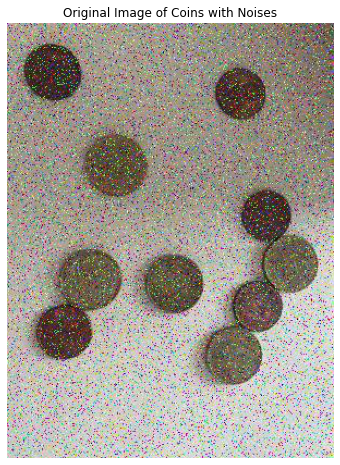

In [7]:
# Import the required packages
from skimage import io
import matplotlib.pyplot as plt
# Load the image of coins
coins_original = io.imread('2077737/2077737_coins.jpg')
# Display the image with an appropriate title
plt.figure(figsize=(8,8))
plt.imshow(coins_original); plt.title('Original Image of Coins with Noises'); plt.axis('off')
print(coins_original.shape)

2. (5 points) Remove the salt and pepper noise in the image and display the denoised image with an appropriate title. Points breakdown: 5 points for removing salt noise, 5 points for removing pepper noise.

   **Report the steps you took briefly to denoise the image as comments in your code.**

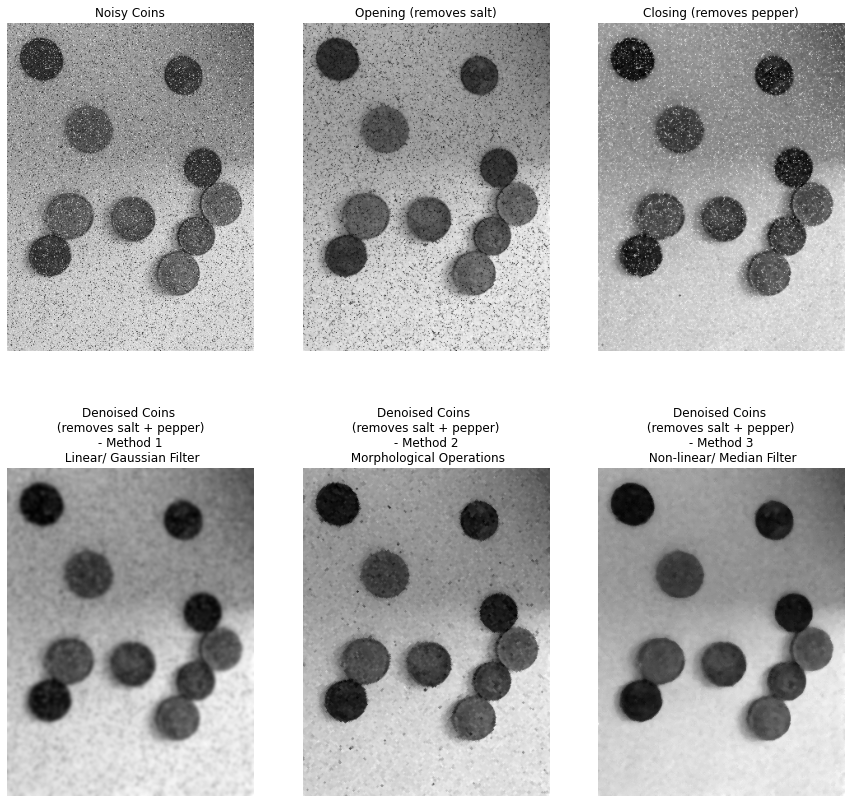

In [8]:
# Import the required packages
from skimage import io, color
from skimage.morphology import square, rectangle, diamond, disk, cube,  octahedron, ball, star, octagon 
from skimage.morphology import opening, closing
from skimage.filters import median 
from scipy.ndimage import gaussian_filter

#Convert the image to grascale
coins_gray = color.rgb2gray(coins_original)
# Remove salt noise
coins_opening = opening(coins_gray, disk(1))
# Remove pepper noise
coins_closing = closing(coins_gray, disk(1))
# Remove salt & pepper noises by applying Gaussian filter
coins_denoised_1 = gaussian_filter(coins_gray, sigma=2)
# Remove salt noise then pepper noise by using morphological operation - applying opening then closing 
coins_denoised_2 = closing(opening(coins_gray, disk(1)))
# Remove salt & pepper noises by applying median filter
coins_denoised_3 = median(coins_gray, disk(3))
                                                 
# Display the steps to denoise the image 
plt.figure(figsize=(15,15))
plt.subplot(231), plt.imshow(coins_gray, cmap = 'gray'), plt.title('Noisy Coins'), plt.axis('off')
plt.subplot(232), plt.imshow(coins_opening, cmap = 'gray'), plt.title('Opening (removes salt)'), plt.axis('off')
plt.subplot(233), plt.imshow(coins_closing, cmap = 'gray'), plt.title('Closing (removes pepper)'),plt.axis('off')
plt.subplot(234), plt.imshow(coins_denoised_1, cmap = 'gray'), plt.title('Denoised Coins \n (removes salt + pepper) \n - Method 1 \n Linear/ Gaussian Filter'), plt.axis('off')
plt.subplot(235), plt.imshow(coins_denoised_2, cmap = 'gray'), plt.title('Denoised Coins \n (removes salt + pepper) \n - Method 2 \n Morphological Operations'), plt.axis('off')
plt.subplot(236), plt.imshow(coins_denoised_3, cmap = 'gray'), plt.title('Denoised Coins \n (removes salt + pepper) \n - Method 3 \n Non-linear/ Median Filter'), plt.axis('off')
plt.show()

# It is noticed that the Median filter (se = disk of size 3)  works best on noisy salt-pepper image hence this image is used to proceed
# with the rest of the assignment (var = coins_denoised_3) 

3. (20 points) Segment the coins to obtain a binary image where pixels representing the coins are set to 1. You should compare two image segmentation algorithms and you can apply morphological operations on these images.

   Points breakdown: maximum of 10 points for each method. Comparing two thresholding algorithms only counts for 1 method. For each method: Full points if each method successfully segments all the coin regions with the original shape of the coins. If the object shapes are slightly distorted, you will get a maximum of 7 points.

   **Report the steps you took to compute two image segmentation algorithms as comments in your code. Display the results of image processing at each step with appropriate titles.**

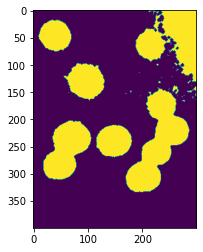

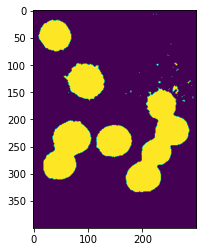

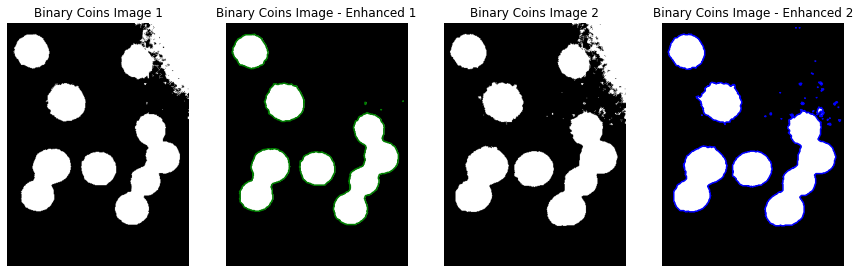

In [13]:
# Import the required packages
import numpy as np
from skimage import io, color
from skimage.filters import threshold_otsu, threshold_local
from skimage.morphology import remove_small_objects
from scipy import ndimage as ndi
from skimage.morphology import binary_closing, binary_opening, binary_dilation, binary_erosion, reconstruction, erosion, dilation, opening, closing, extrema
from skimage.filters import roberts, sobel, sobel_h, sobel_v, prewitt, prewitt_v, prewitt_h
from skimage.color import label2rgb
from scipy.ndimage.morphology import binary_fill_holes
from skimage.segmentation import clear_border

# Normarlize the intensity values a range between 0 and 1
im = coins_denoised_3 - coins_denoised_3.min()
im = coins_denoised_3/coins_denoised_3.max()

## Thresholding Otsu
# Convert grayscale image to binary ones (binarizing the image)
coins_bw_1 = im < threshold_otsu(im)
# Fill tiny holes inside the coins
coins_bw_1_filled = binary_fill_holes(coins_bw_1, structure=np.ones((3,3)))
# Perform closing on the image to sharpen the edges
coins_bw_closed_1 = binary_closing(coins_bw_1_filled, disk(5))
# Remove small objects and clear top right border
coins_bw_denoised_1 = clear_border(remove_small_objects(coins_bw_closed_1,1500))

## Thresholding Local
# Convert grayscale image to binary ones (binarizing the image)
coins_bw_2 = im < threshold_local(im, block_size = 303, method = 'mean')
# Perform closing on the image to sharpen the edges
coins_bw_closed_2 = binary_closing(coins_bw_2, disk(2))
plt.figure() 
plt.imshow(coins_bw_closed_2)
# Remove small objects and clear top right border
coins_bw_denoised_2 = clear_border(remove_small_objects(coins_bw_closed_2,1)
plt.figure() 
plt.imshow(coins_bw_denoised_2)

# Display the images side by side with appropriate titles
fig, axes = plt.subplots(ncols = 4, figsize = (15,15), sharex = True, sharey = True)
ax = axes.ravel()
ax[0].imshow(coins_bw_1, cmap = 'gray'), ax[0].set_title("Binary Coins Image 1"), ax[0].axis('off')
ax[2].imshow(coins_bw_2, cmap = 'gray'), ax[1].set_title("Binary Coins Image - Enhanced 1"), ax[2].axis('off')
ax[1].imshow(coins_bw_denoised_1, cmap = 'gray'), ax[2].set_title("Binary Coins Image 2"), ax[1].axis('off')
ax[1].contour(coins_bw_denoised_1, [0.5], colors='g')
ax[3].imshow(coins_bw_denoised_2, cmap = 'gray'), ax[3].set_title("Binary Coins Image - Enhanced 2"), ax[3].axis('off')
ax[3].contour(coins_bw_denoised_2, [0.5], colors='b')

4. (20 points) Sets of white pixels which are connected to each other are called connected components or objects. 

   (i) connect all the connected components and visualize each connected component with a different color overlaid on the denoised image. 
   
   (ii) separate the touching coins (visualize each coin with a different color overlaid on the denoised image).

   Marks breakdown: 7 points for connecting pixels to form connected components in (i). 8 points for applying an algorithm to separate the touching objects. 5 points for fully separating each object in (ii) such that there is no over segmentation or under segmentation and each object has approximately the same size as the coins in the original image.

   **Display the resulting images with appropriate titles. Report the steps you took as comments in your code.**

In [ ]:
# Import the required packages
from skimage.measure import label, regionprops
from scipy import ndimage as ndi

#from skimage.morphology import watershed
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Make a copy of the previously denoised images 
img1 = coins_bw_denoised_1.copy()
img2 = coins_bw_denoised_2.copy()

## Connected components
# Connect all the connected components
label_img = label(img1)
# Visualize each connected component with a different color overlaid on the denoised image
image_label_overlay = label2rgb(label_img, image = coins_denoised_3, bg_label = 0)
# Display the result
fig, axes = plt.subplots(ncols=4, figsize=(15,15), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(image_label_overlay, cmap = 'gray'), ax[0].axis('off')
ax[0].set_title('4i. Connected coins overlaid \n on denoised image')

## Separate the touching coins (visualize each coin with a different color overlaid on the denoised image
# Detect circular objects using a distance transfrom. 
distance = ndi.distance_transform_edt(img1)

# Markers are created by taking local maxima of the distance to the background
local_maxi = peak_local_max(distance, footprint=np.ones((16, 15)), labels=img1)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(local_maxi.T)] = True
markers, _ = ndi.label(mask)

# Run watershed function to separate the coins:
# (1) The complement of the distance (-distance) returns two catchment basins 
# (2) An array marking the basins with the values to be assigned in the label matrix.
# (3) Array of same shape as image. Only points at which mask == True will be labeled 
watershed_labels = watershed(-distance, markers, mask=img1)

# Visualize each coin with a different color overlaid on the denoised image
watershed_labels_overlay = color.label2rgb(watershed_labels, image=coins_denoised_3,  bg_label=0)

# Display the result next to the cleaned binarized image with overlapping coins
ax[1].imshow(coins_bw_denoised_1, cmap=plt.cm.gray), ax[1].axis('off')
ax[1].set_title('4ii. Binary connected coins')
ax[2].imshow(watershed_labels, cmap=plt.cm.nipy_spectral), ax[2].axis('off')
ax[2].set_title('4ii. Separated binary coins')
ax[3].imshow(watershed_labels_overlay, cmap=plt.cm.nipy_spectral), ax[3].axis('off')
ax[3].set_title('4ii. Separated coins overlaid \n on denoised image')

5. (5 points) Show your original image with an overlay of bounding boxes or circular boundaries of each coin you found. List the number of coins your code found.

   Marks breakdown: 4 points displaying the bounding boxes or circular boundaries where the boxes or circles bound each coin. 1 points for code to calculate the number of coins in the image.

   **Display the resulting images with appropriate titles. Print the number of coins. Report the steps you took as comments in your code.**

In [ ]:
# Load the necessary function from the scikit packages
from skimage.measure import find_contours
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter

# Convert watershed image to grayscale: 
image = color.rgb2gray(watershed_labels_overlay).copy()

# Detect the edges of the coins
edges = canny(image, sigma = 0.5)
plt.figure() 
plt.imshow(edges)

# Detect the radii's
hough_radii = np.arange(21, 37, 4)
hough_res = hough_circle(edges, hough_radii)

# Select the 10 coins
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,total_num_peaks=10, min_xdistance = 150)

# Draw the circular boundary for each coin
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9, 9)) # plot figure
count = 0 # initiate coin count
image = coins_original 
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)
    count += 1

# Display the original image with an overlay of circular boundaries on each coin
ax.imshow(image), ax.axis('off'), 
ax.set_title('Original image with an overlay of circular boundaries of each coin ')
plt.show()

# Print the number of coins detected in the image
print('\033[1m' + '   Number of coins found in this image: ' + str(count)+ '\033[0m')

6. (10 points) The image contains 5 cents and 50 cents. Indicate the amount of money your code finds in the image. Show your original image with an overlay of green points on the centroids of 5 cents and red points on the centroids of 50 cents.

   Marks breakdown: 8 points displaying the centroids with appropriate colors on 5 cents and 50 cents. 2 points for code to calculate the amount of money present in the image.

   **Display the resulting images with appropriate titles. Print the amount of money in the image. Report the steps you took as comments in your code.**

In [ ]:
# Import necessary packages
from skimage.io import imread, imshow
from skimage.filters import gaussian, threshold_otsu
from skimage import measure
import matplotlib.pyplot as plt

# Display the steps applied on the coin images so far
original = coins_original
denoised = coins_denoised_3
binarized = coins_bw_denoised_1
labeled = watershed_labels
plots = {'Original': original, 'Denoised': denoised, 
         'Binarized': binarized, 'Labeled': labeled}
fig, ax = plt.subplots(1, len(plots), figsize = (15,10))
for n, (title, img) in enumerate(plots.items()):
    cmap = plt.cm.gnuplot if n == len(plots) - 1 else plt.cm.gray
    ax[n].imshow(img, cmap=cmap)
    ax[n].axis('off')
    ax[n].set_title(title)
plt.show(fig)

# Displaying the centroids with appropriate colors on 5 cents and 50 cents.
plt.figure(figsize=(15,10))
plt.imshow(coins_original, cmap=plt.cm.gray), plt.axis('off')
plt.title('Original image with an overlay of green points on the centroids of 5 cents \n and red points on the centroids of 50 cents')
regions = measure.regionprops(watershed_labels)

# Initiate the count of each coin value: 
five_cents = 0
fifty_cents = 0

# Mark the coins with appropriate color label (green on 5 cents and red of 50 cents) according to its size
for prop in regions:
    object_label = prop.label
    object_size = prop.area
    y0, x0 = prop.centroid
    print(object_size)
    if object_size in range(1800, 2300) or object_size == 2293: # there is this five cent on top left corner has bigger size than 
        # the rest within the same size range but can be detected from the original image as a five cent by looking at the color 
        five_cents += 1 # update the count of five-cent coins
        plt.plot(x0, y0, 'vg', markersize=15)
    elif object_size in range(2200, 2800):
        fifty_cents += 1 # update the count of fifty-cent coins
        plt.plot(x0, y0, 'vr', markersize=15)

# Print the computed total amount of money in the image
print('\033[1m' + f'The amount of 5-cent coins found in the image: {five_cents}' + '\033[0m')
print('\033[1m' + f'The amount of 50-cent coins found in the image: {fifty_cents}' + '\033[0m')
print('\033[1m' + f'The toal amount of money found in the image: {50*fifty_cents + 5*five_cents}' + '\033[0m')